In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/globallanduse/Global-land-use-graphic.png
/kaggle/input/ecological-footprint/countries.csv


**Introduction:** 

When I came across the 'Global land use for food production' graph below in a recent IPCC Climate Report, and saw that 77% of agricultural land is being use for livestock, I decided to investigate the main contributors. 

It's no mystery that food reserves are under duress due to climate change, rapid population growth (especially in areas with high levels of water/food scarcity), conspicious consumption, excess waste, among other factors. Therefore, it's critical to pinpoint volatile areas, main contributors, and those leading the way in terms of sustainability in order to learn and develop contextually rooted and data-driven results. 

In turn, I found the 2016 Ecological Footprint data set on Kaggle and decided to dig a little and uncover which countries had the highest 'Cropland' and 'Grazing Land Footprints' and compare such with the global averages, and their ecological footprints and bioreserves/deficits. 

**Data set:**

The ecological footprint measures the ecological assets that a given population requires to produce the natural resources it consumes (including plant-based food and fiber products, livestock and fish products, timber and other forest products, space for urban infrastructure) and to absorb its waste, especially carbon emissions. The footprint tracks the use of six categories of productive surface areas: cropland, grazing land, fishing grounds, built-up (or urban) land, forest area, and carbon demand on land.

A nation’s biocapacity represents the productivity of its ecological assets, including cropland, grazing land, forest land, fishing grounds, and built-up land. These areas, especially if left unharvested, can also absorb much of the waste we generate, especially our carbon emissions.

Both the ecological footprint and biocapacity are expressed in global hectares — globally comparable, standardized hectares with world average productivity.

If a population’s ecological footprint exceeds the region’s biocapacity, that region runs an ecological deficit. Its demand for the goods and services that its land and seas can provide — fruits and vegetables, meat, fish, wood, cotton for clothing, and carbon dioxide absorption — exceeds what the region’s ecosystems can renew. A region in ecological deficit meets demand by importing, liquidating its own ecological assets (such as overfishing), and/or emitting carbon dioxide into the atmosphere. If a region’s biocapacity exceeds its ecological footprint, it has an ecological reserve.




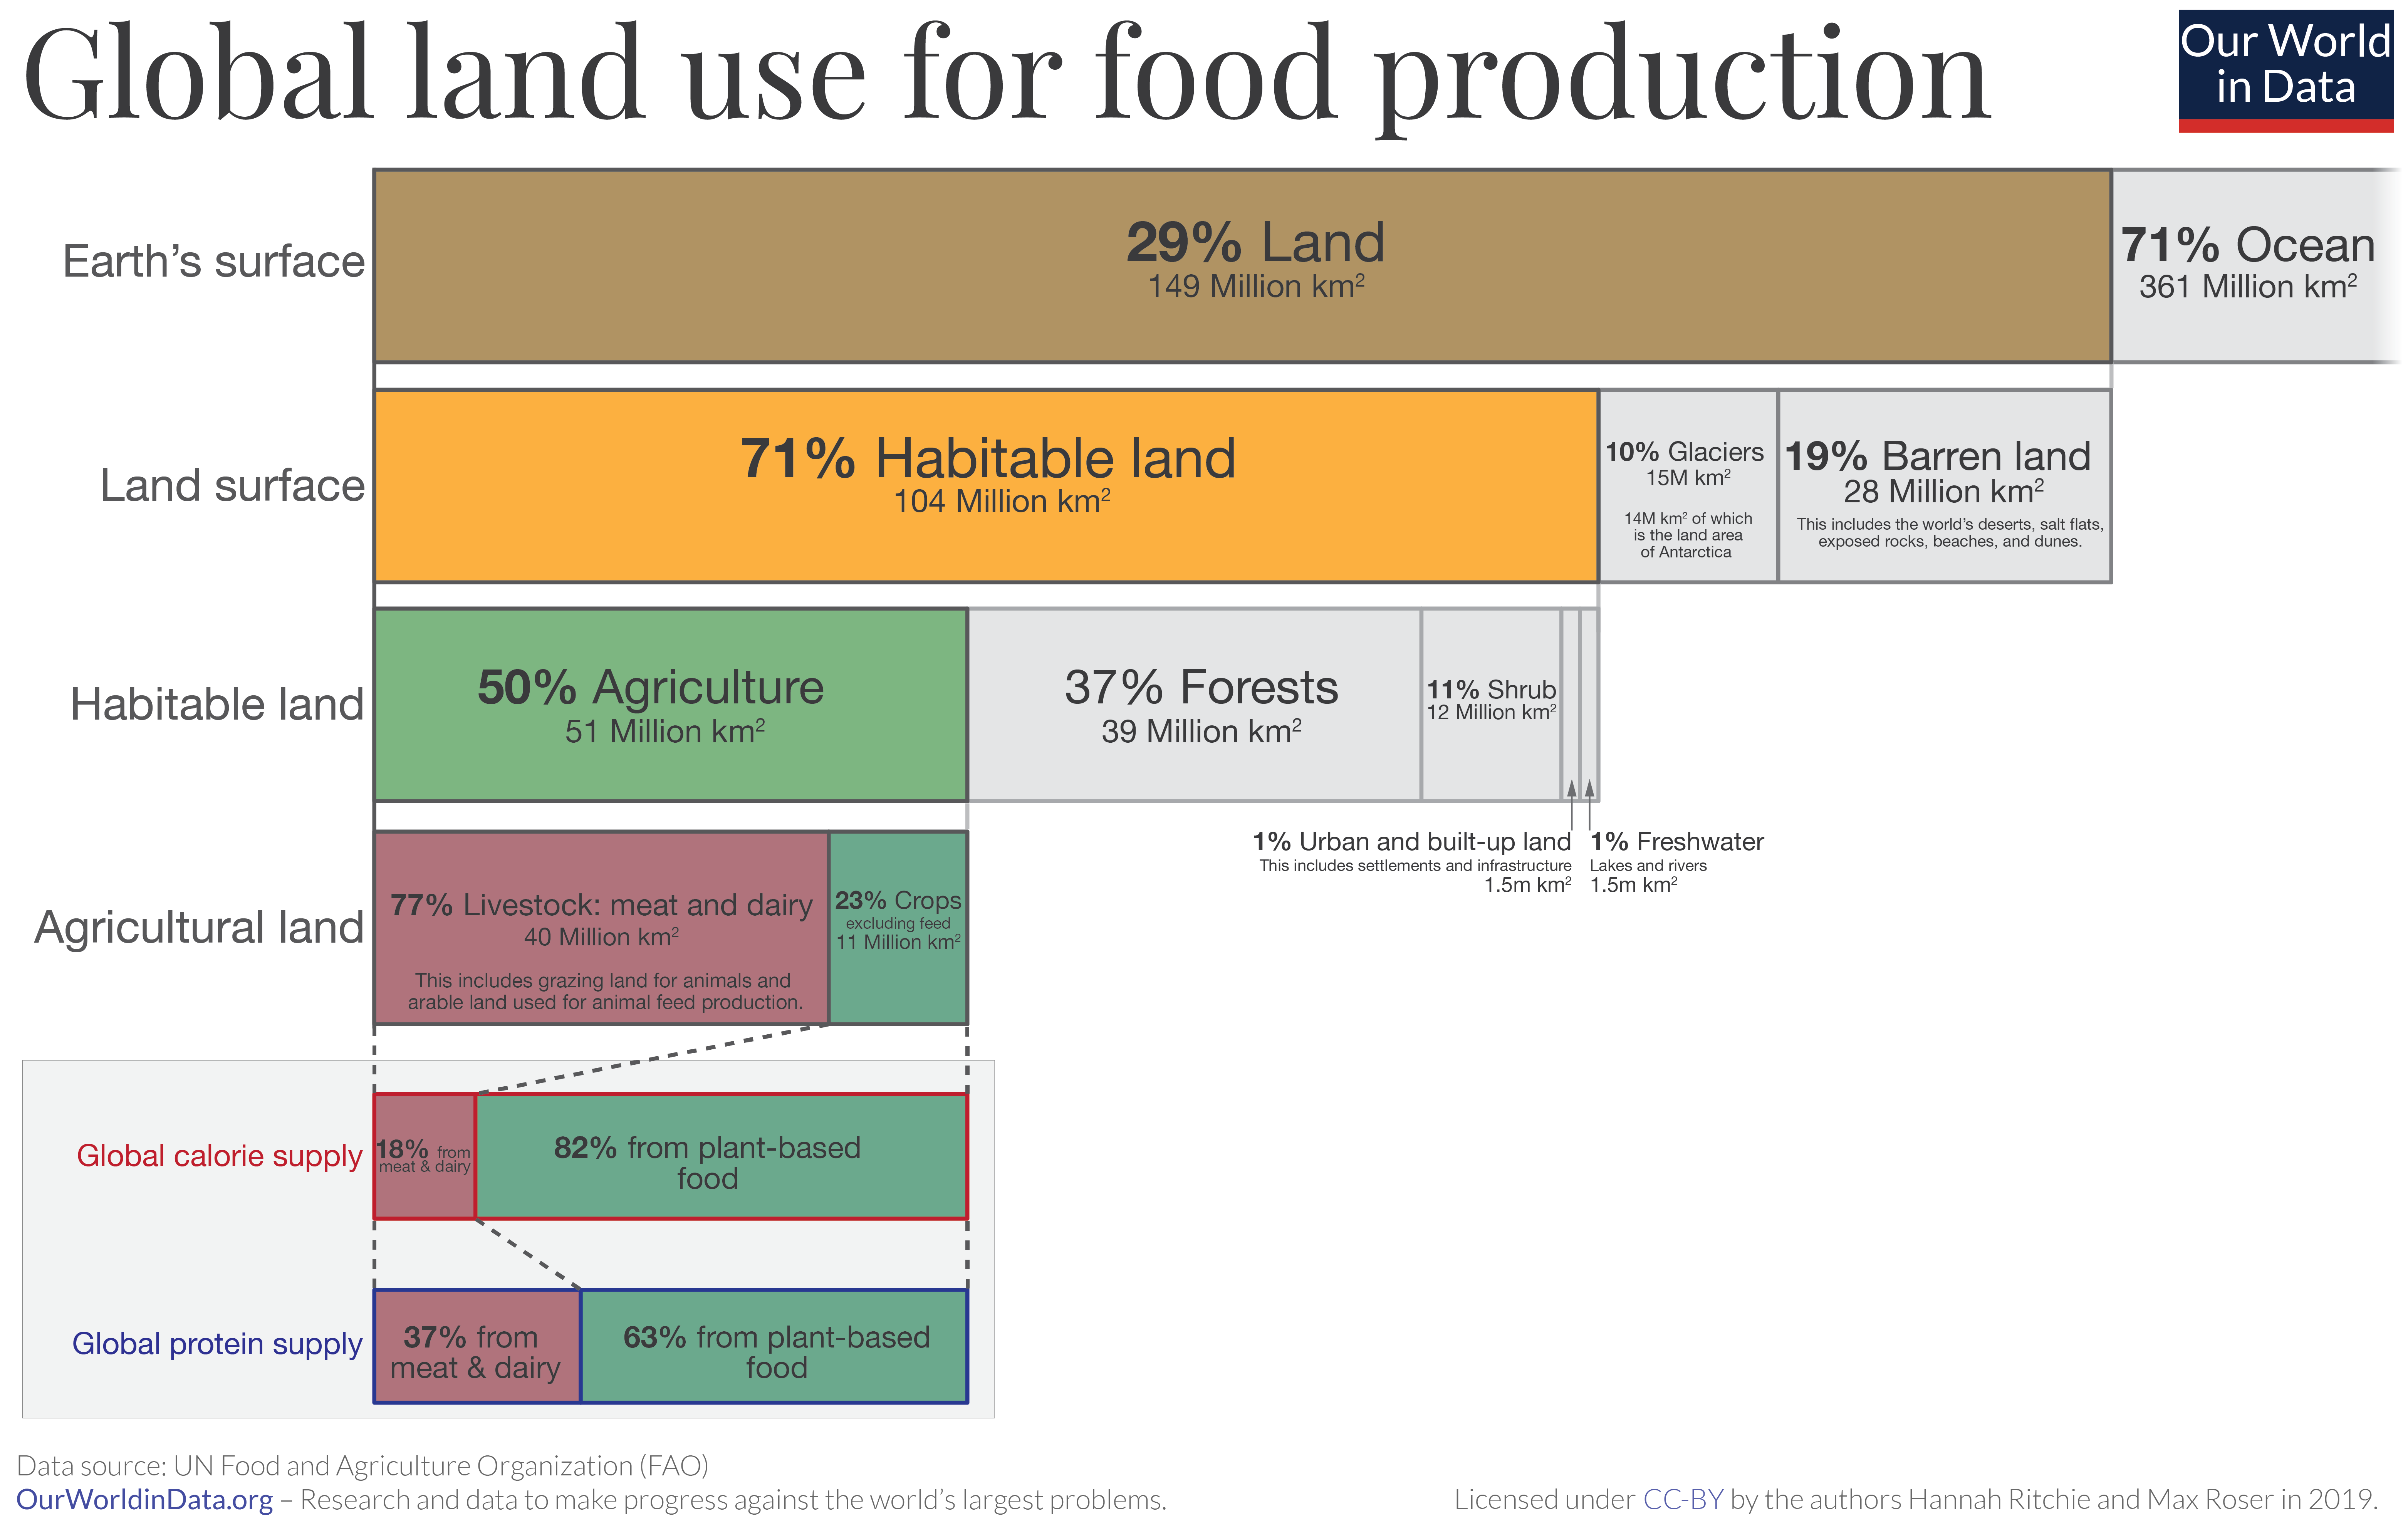

In [2]:
from IPython.display import Image
Image(filename='../input/globallanduse/Global-land-use-graphic.png')

**Data Pre-Processing**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import spearmanr

# given dataframe df
df = pd.read_csv('/kaggle/input/ecological-footprint/countries.csv')

df.drop(columns= ['Population (millions)', 'HDI', 'GDP per Capita','Fish Footprint','Fishing Water',
                  'Urban Land','Earths Required', 'Countries Required', 'Data Quality'], axis=1, inplace = True)


df = df.replace('United States of America', 'U.S.A')
df = df.replace('Venezuela, Bolivarian Republic of', 'Venezuela')


#Identifying and dropping NaN values 

df_nan= df.isna().sum()
df = df.dropna()


#Sorting
df_top_crop = df.nlargest(16, 'Cropland Footprint').reset_index()
df_top_grazing = df.nlargest(16, 'Grazing Footprint').reset_index()
df_top_carbon = df.nlargest(16, 'Carbon Footprint').reset_index()
df_top_eco = df.nlargest(16, 'Total Ecological Footprint').reset_index() 
df_top_grazlandQuant = df.nlargest(16, 'Grazing Land').reset_index() 
df_top_bioreserve= df.nlargest(16, 'Biocapacity Deficit or Reserve').reset_index() 
df_top_biodeficit= df.nsmallest(16, 'Biocapacity Deficit or Reserve').reset_index() 

#Variables
X=df_top_crop.iloc[:, 1]
y=df_top_crop.iloc[:, 3]

X2 = df_top_grazing.iloc[:,1]
y2 = df_top_grazing.iloc[:,4]

X3 = df_top_carbon.iloc[:,1]
y3 = df_top_carbon.iloc[:,6]

X4 = df_top_eco.iloc[:,1]
y4 = df_top_eco.iloc[:,7]

X5 = df_top_grazlandQuant.iloc[:,1]
y5 = df_top_grazlandQuant.iloc[:,9]

X6=df_top_bioreserve.iloc[:,1]
y6=df_top_bioreserve.iloc[:,12]

plt.style.use('dark_background')

Before we dive into the comparison, I thought it would be nice to first take a look at the nations with the highest and lowest emission rates as a whole, before analyzing specific Agricultural and Grazing Land emission sources and see how they compare. 



Text(0.5, 1.02, 'Global Ecological Footprint & Bioreserve Analysis')

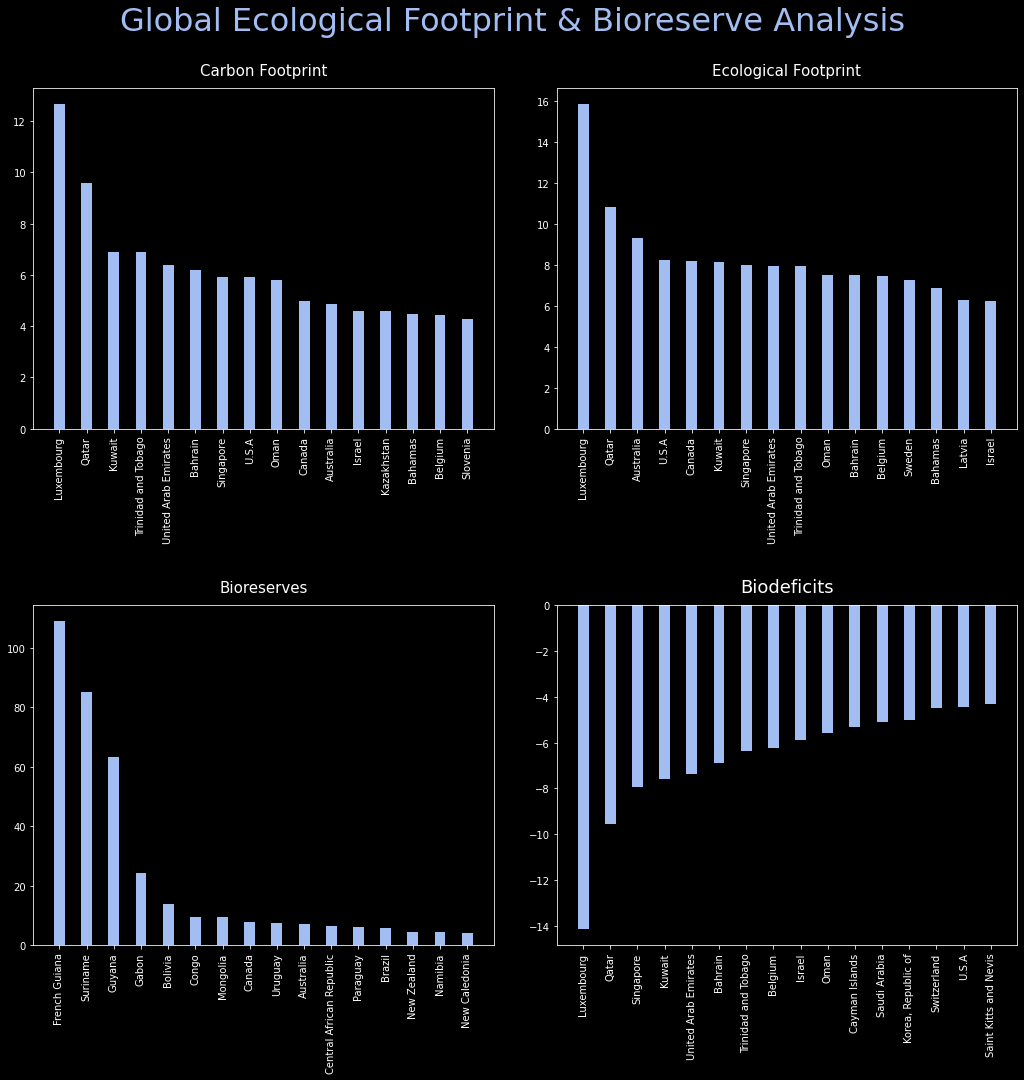

In [4]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8

X3 = df_top_carbon.iloc[:,1]
y3 = df_top_carbon.iloc[:,6]

X4 = df_top_eco.iloc[:,1]
y4 = df_top_eco.iloc[:,7]

X6=df_top_bioreserve.iloc[:,1]
y6=df_top_bioreserve.iloc[:,12]

X7=df_top_biodeficit.iloc[:,1]
y7=df_top_biodeficit.iloc[:,12]

ax[0,0].bar(X3,y3,width=.4, color=['#A2BDF2'])
ax[0,1].bar(X4,y4,width=.4,color=['#A2BDF2'])
ax[1,0].bar(X6,y6,width=.4,color=['#A2BDF2'])
ax[1,1].bar(X7,y7,width=.4,color=['#A2BDF2'])

ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

ax[0,0].set_title('Carbon Footprint',fontsize=15, y=1.02)
ax[0,1].set_title('Ecological Footprint',fontsize=15, y=1.02)
ax[1,0].set_title('Bioreserves',fontsize=15, y=1.02)
ax[1,1].set_title('Biodeficits',fontsize=18, y=1.02)

fig.tight_layout(pad=3.5)
fig.suptitle('Global Ecological Footprint & Bioreserve Analysis', fontsize=32, y=1.02, color='#A2BDF2')


<AxesSubplot:title={'center':'Main Dataframe Global Averages'}>

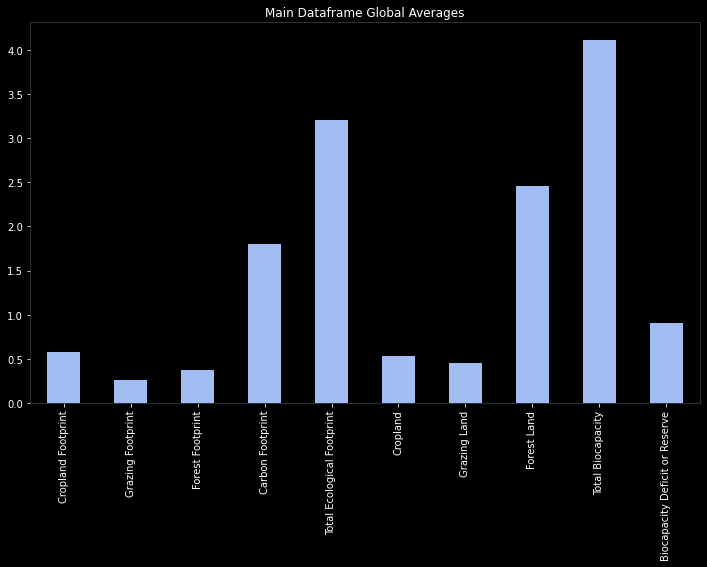

In [5]:
df.mean().plot(kind='bar', title= "Main Dataframe Global Averages", figsize=(12,7), color='#A2BDF2')


Now that we have a general insight into the main emissions contributors, and a baseline set in terms of the global cropland and grazing land emission averages, we can dig deeper to see which nations are leading these respective categories and to what extent they exceed the averages. 

Text(0.5, 1.02, 'Analysis of 16 Countries with the Top Global Cropland Footprints')

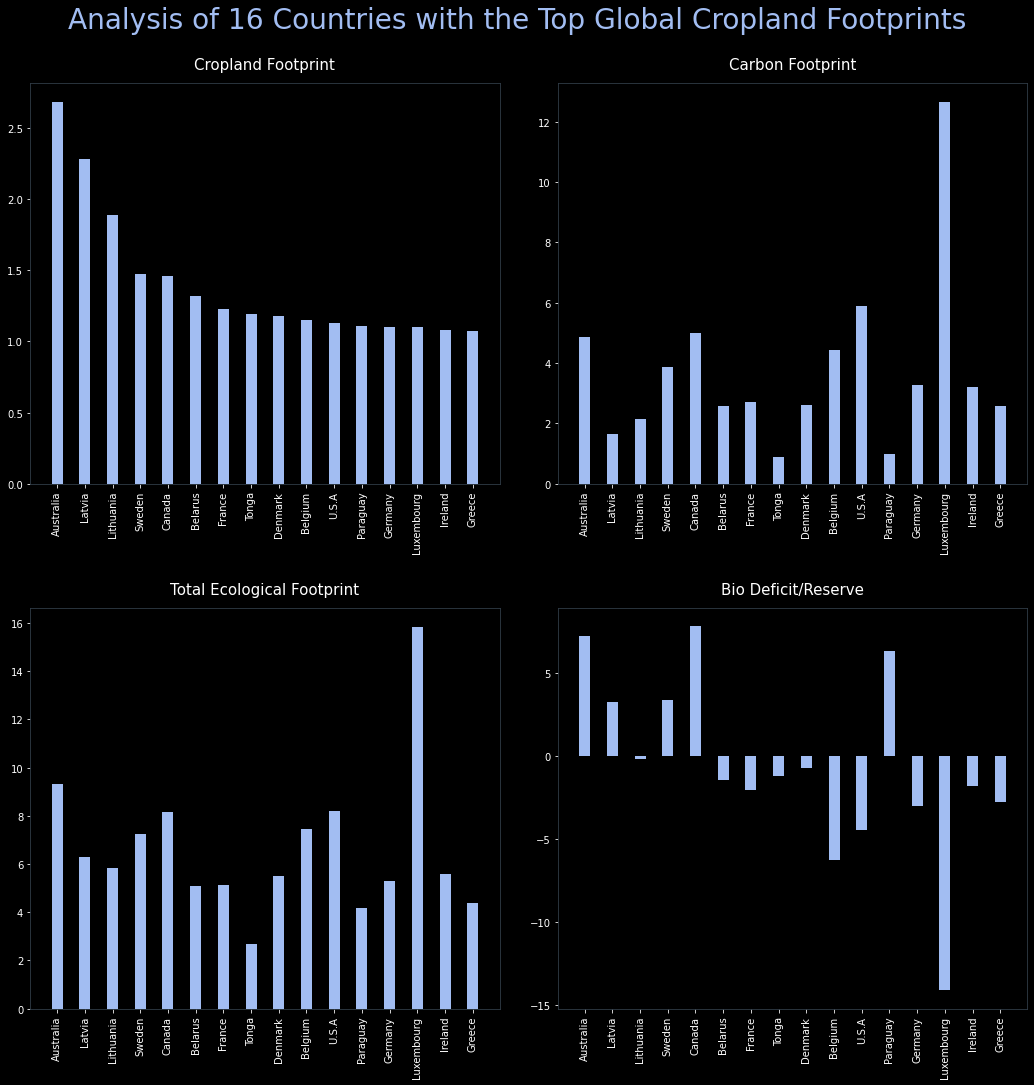

In [6]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8

X=df_top_crop.iloc[:, 1]
y=df_top_crop.iloc[:, 3]
y_carbon_fprint=df_top_crop.iloc[:, 6]
y_eco_fprint=df_top_crop.iloc[:, 7]
y_bio_deficit=df_top_crop.iloc[:, 12]

ax[0,0].bar(X,y,width=.4,color=['#A2BDF2'])
ax[0,1].bar(X,y_carbon_fprint,width=.4,color=['#A2BDF2'])
ax[1,0].bar(X,y_eco_fprint,width=.4,color=['#A2BDF2'])
ax[1,1].bar(X,y_bio_deficit,width=.4,color=['#A2BDF2'])

ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

ax[0,0].set_title('Cropland Footprint',fontsize=15, y=1.02)
ax[0,1].set_title('Carbon Footprint',fontsize=15, y=1.02)
ax[1,0].set_title('Total Ecological Footprint',fontsize=15, y=1.02)
ax[1,1].set_title('Bio Deficit/Reserve',fontsize=15, y=1.02)

fig.tight_layout(pad=3.0)
fig.suptitle('Analysis of 16 Countries with the Top Global Cropland Footprints', fontsize=28, y=1.02,color='#A2BDF2')


Text(0.5, 1.03, 'Analysis of 16 Countries with the Top Global Grazing Footprints')

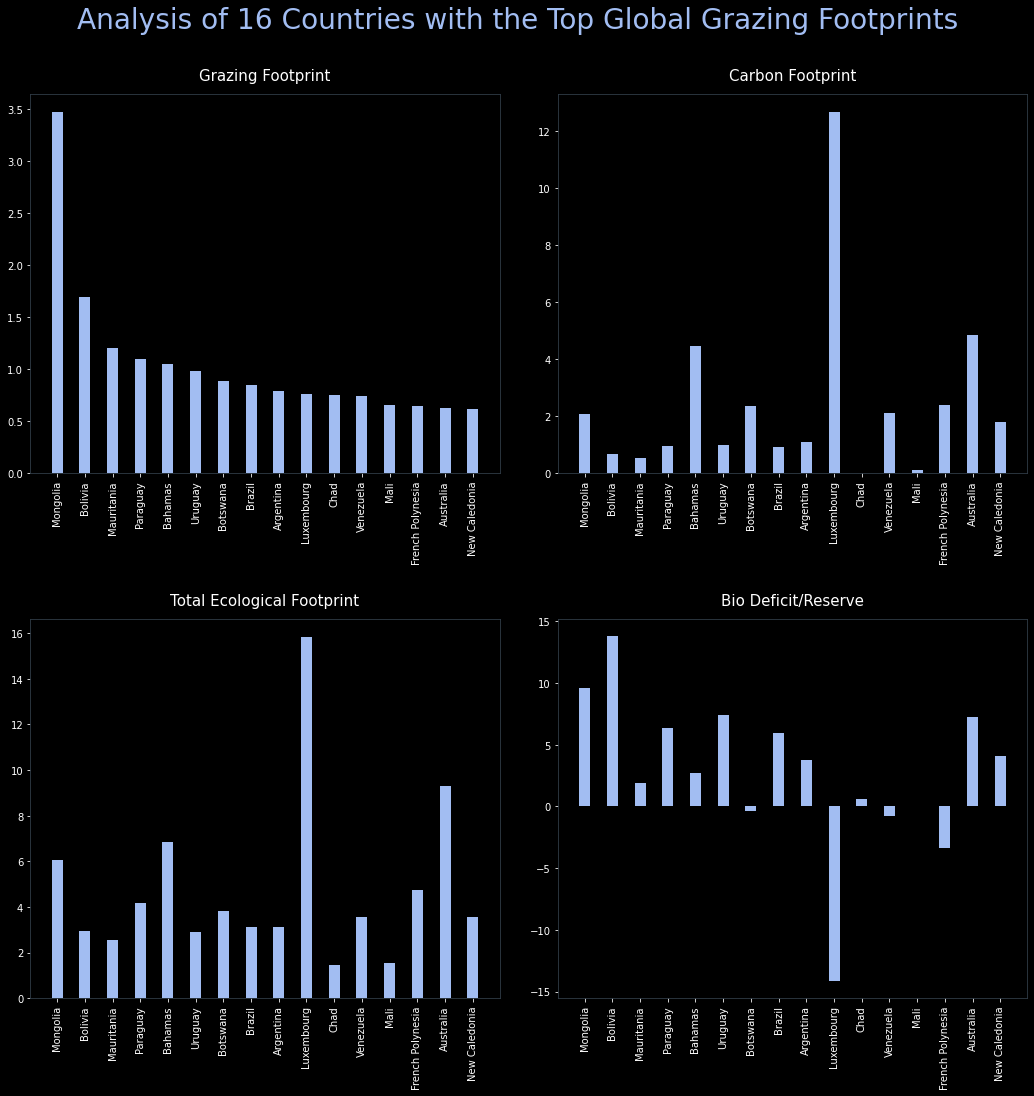

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8

X=df_top_grazing.iloc[:, 1]
y=df_top_grazing.iloc[:, 4]
y_carbon_fprint=df_top_grazing.iloc[:, 6]
y_eco_fprint=df_top_grazing.iloc[:, 7]
y_bio_deficit=df_top_grazing.iloc[:, 12]

ax[0,0].bar(X,y,width=.4,color=['#A2BDF2'])
ax[0,1].bar(X,y_carbon_fprint,width=.4,color=['#A2BDF2'])
ax[1,0].bar(X,y_eco_fprint,width=.4,color=['#A2BDF2'])
ax[1,1].bar(X,y_bio_deficit,width=.4,color=['#A2BDF2'])

ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

ax[0,0].set_title('Grazing Footprint',fontsize=15, y=1.02)
ax[0,1].set_title('Carbon Footprint',fontsize=15, y=1.02)
ax[1,0].set_title('Total Ecological Footprint',fontsize=15, y=1.02)
ax[1,1].set_title('Bio Deficit/Reserve',fontsize=15, y=1.02)

fig.tight_layout(pad=3.0)
fig.suptitle('Analysis of 16 Countries with the Top Global Grazing Footprints', fontsize=28, y=1.03, color ='#A2BDF2')


When comparing these 2 top 16 groups to the global averages, the main contributors are 3-4 times that of the global mean, with Cropland having a higher standard deviation. Interestingly, Brazil did not make the top Cropland Footprint 16, as would be expected with the vast rainforest clearing taken place in recent decades. This could lead one to believe that this cleared land is being used more so for grazing, than crops, or for crops specifically to feed grazing animals or industrial processes, however, more research and evidence is required to confirm such a claim.

With regards to Mongolia, I did not expect to see them in a number 1 position, but further research shows that in the 1990s, after the decline of communism in Mongolia, the strict quotas on the number of grazing animals allowed across the vast grasslands were abandoned. Since then, the country has gone from 20 million grazing livestock to 61.5 million, eating their way across the land. Although this accounts for the increase in supply, it would be interesting to delve more into nations with the highest demand for meat in order to gain a better grasp on the cultural context, and craft appropriate reduction strategies.

While at first glance, one can see that nations with higher Cropland Footprints, also have higher bio-deficits. However, it is important to note that the nations in this category have a higher average GDP/per capita, then in the top Grazing Land Footprint category. In turn, the nations in the former are expected to consume, drive, and use more resources in general, resulting in the higher emissions rates. That being said, it was surprising to see Australia above the U.S in terms of their emission footprints, when considering the culture of conspicuous consumption, waste, and excessiveness.

Lastly, Luxembourg must be mentioned, as it clearly leads the way in emissions. While the nation's high incomes are no secret, to put things into perspective, the richest 1% of Luxembourg’s population have a carbon footprint 26 times higher than the EU average, 214 tonnes of CO2 per capita, exceeding even that of the U.S at roughly 195 tonnes per capita.

Annual emissions of the poorest 50% of EU citizens fell by 24% in the 25 years between 1990 and 2015. Those of the 40% of middle-class EU citizens fell by 13%, while the emissions of the richest 10% grew by 3%, and of the richest 1% by 5%. As a result, the richest 10% of EU citizens have a footprint per capita more than 10 times higher than the level needed by 2030 to achieve the 1.5°C goal. The footprint of the richest 1% is 30 times higher (Schnuer, 2020).

In turn, while this analysis clearly illustrates the main Cropland and Grazing Land contributors in terms of their carbon and ecological impacts, the rising footprint of the top income classes sheds light on the demand aspect which hinders reduction efforts while signaling future issues that will arise when 'developing' nations consume at a similar rate of those considered 'developed'.

In terms of future research opportunities, it would be intriguing to delve into the diversity of crops being produced, and the emissions differences between those with a large variety compared to those with a monocrop focus.